# Chapter 5. 정규선형모델

## 5.3. 독립변수가 여럿인 모델

### 5.3.1 분석준비

In [1]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 통계모델을 추정하는 데 사용하는 라이브러리
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 표시자릿수 지정
%precision 3
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

In [2]:
# 데이터 로드(어느 가게의 매상데이터)
sales = pd.read_csv("5-3-1-lm-model.csv")
print(sales.head(3))

   humidity  price  sales  temperature weather
0      29.5    290  229.7         17.8   rainy
1      38.1    290  206.1         26.1   rainy
2      31.5    290  202.5         22.0   rainy


### 5.3.2 데이터로 그래프 그리기

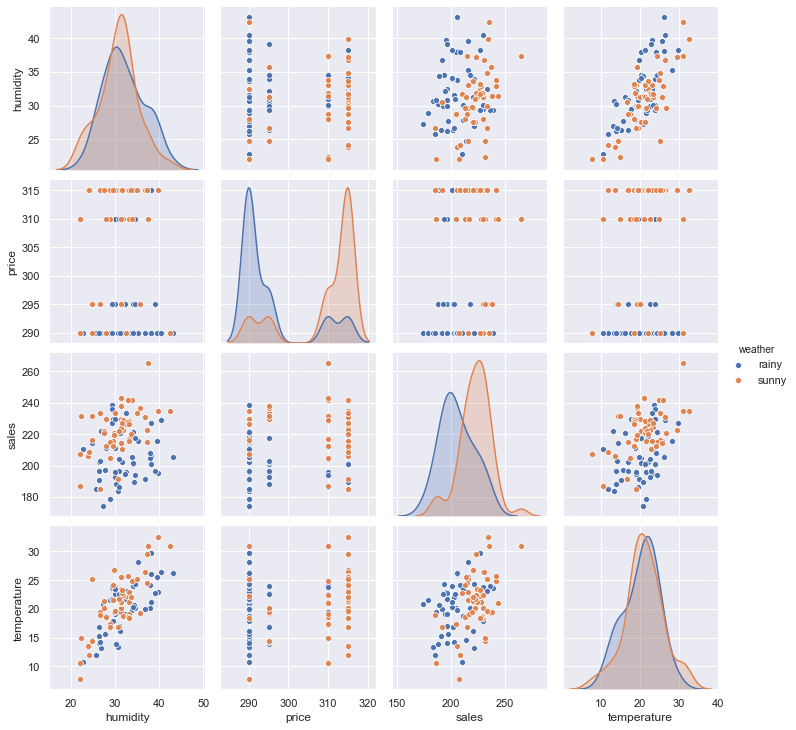

In [6]:
# 독립변수가 여러개 있으므로, 페어플롯을 그려봄
sns.pairplot(data = sales, hue = "weather")

### 5.3.3 나쁜 분석 예: 변수가 1개인 모델 만들기

In [7]:
# 독립변수에 가격만 사용한 단순회귀모델
lm_dame = smf.ols("sales ~ price", sales).fit()
lm_dame.params

Intercept    113.645406
price          0.332812
dtype: float64

In [8]:
# 분산분석을 사용해서 검정
print(sm.stats.anova_lm(lm_dame, typ=2))

                sum_sq    df         F    PR(>F)
price      1398.392322   1.0  4.970685  0.028064
Residual  27570.133578  98.0       NaN       NaN


[분석 결과]

p value가 0.05보다 작게 나옴  

→ 가격이 오르면 매상도 증가한다

→ 매상을 늘리고 싶다면, 가격을 올리면 된다!

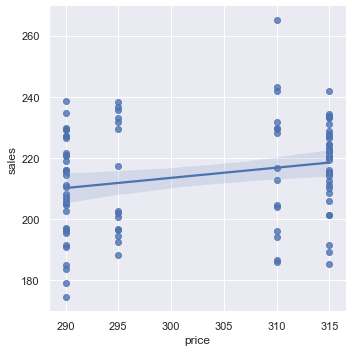

In [11]:
# 회귀 직선
sns.lmplot(x = "price", y = "sales", data = sales)

### 5.3.4 독립변수 간의 관계 조사하기

In [12]:
# 날씨별 평균값
print(sales.groupby("weather").mean())

         humidity  price    sales  temperature
weather                                       
rainy      32.126  295.5  205.924       20.422
sunny      30.852  309.5  222.718       21.102


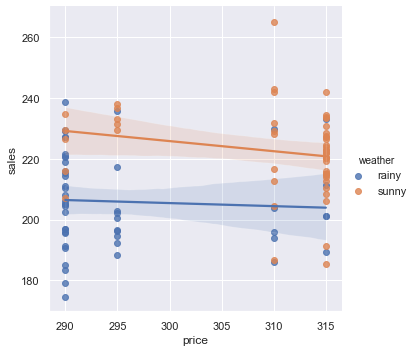

In [14]:
# 날씨가 같을 떄, 상품 가격이 매상에 미치는 영향
sns.lmplot(x = "price", y = "sales", data = sales, 
           hue="weather")

[분석 결과]

* 맑은 날에 매상이 높다

* 날씨별로 분리해서 살펴봤을 때, 가격이 높아지면 매상이 줄어든다

* 

### 5.3.5 복수의 독립변수를 가지는 모델

In [15]:
# 복수의 독립변수를 가진 모델 추정
lm_sales = smf.ols(
    "sales ~ weather + humidity + temperature + price",
    data=sales).fit()
# 추정된 결과
lm_sales.params

Intercept           278.627722
weather[T.sunny]     19.989119
humidity             -0.254055
temperature           1.603115
price                -0.329207
dtype: float64

### 5.3.6 나쁜 분석 예: 일반적인 분산분석으로 검정하기

In [16]:
# Type 1 ANOVA
# round(3) : 출력되는 자릿수 지정
print(sm.stats.anova_lm(lm_sales, typ=1).round(3))

               df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  38.848   0.000
humidity      1.0   1779.601  1779.601   9.805   0.002
temperature   1.0   2076.845  2076.845  11.443   0.001
price         1.0    818.402   818.402   4.509   0.036
Residual     95.0  17242.717   181.502     NaN     NaN


In [17]:
# 독립변수의 순서를 바꿈
lm_sales_2 = smf.ols(
    "sales ~ weather + temperature + humidity + price",
    data=sales).fit()
# 검정결과
print(sm.stats.anova_lm(lm_sales_2, typ=1).round(3))

               df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  38.848   0.000
temperature   1.0   3814.779  3814.779  21.018   0.000
humidity      1.0     41.667    41.667   0.230   0.633
price         1.0    818.402   818.402   4.509   0.036
Residual     95.0  17242.717   181.502     NaN     NaN


### 5.3.7 회귀계수의 t검정

In [18]:
# 모델 1의 회귀 계수의 t 검정
lm_sales.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


In [19]:
# 모델 2의 회귀 계수의 t 검정
lm_sales_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


### 5.3.9 모델 선택과 분산분석

In [21]:
# Null모델의 잔차제곱합
mod_null = smf.ols("sales ~ 1", sales).fit()
resid_sq_null = np.sum(mod_null.resid ** 2)
resid_sq_null

28968.525899999993

In [23]:
# 날씨 모델의 잔차제곱합
mod_1 = smf.ols("sales ~ weather", sales).fit()
resid_sq_1 = np.sum(mod_1.resid ** 2)
resid_sq_1

21917.56499999999

In [24]:
# 잔차 제곱의 차
resid_sq_null - resid_sq_1

7050.960900000002

In [25]:
print(sm.stats.anova_lm(mod_1).round(3))

            df     sum_sq   mean_sq       F  PR(>F)
weather    1.0   7050.961  7050.961  31.527     0.0
Residual  98.0  21917.565   223.649     NaN     NaN


In [29]:
# 날씨 + 습도 모델의 잔차 제곱합
mod_2 = smf.ols(
    "sales ~ weather + humidity", sales).fit()
resid_sq_2 = np.sum(mod_2.resid ** 2)
resid_sq_2

20137.963897851754

In [30]:
# 잔차 제곱의 차이
resid_sq_1 - resid_sq_2

1779.6011021482373

In [21]:
print(sm.stats.anova_lm(mod_2).round(3))

            df     sum_sq   mean_sq       F  PR(>F)
weather    1.0   7050.961  7050.961  33.963   0.000
humidity   1.0   1779.601  1779.601   8.572   0.004
Residual  97.0  20137.964   207.608     NaN     NaN


In [22]:
# 날씨 + 기온 모델의 잔차 제곱합
mod_2_2 = smf.ols(
    "sales ~ weather + temperature", sales).fit()
resid_sq_2_2 = sp.sum(mod_2_2.resid ** 2)
resid_sq_2_2

18102.786

In [23]:
# 날씨 + 온도 + 습도 모델의 잔차 제곱합
mod_3_2 = smf.ols(
    "sales ~ weather + temperature + humidity",
    sales).fit()
resid_sq_3_2 = sp.sum(mod_3_2.resid ** 2)
resid_sq_3_2

18061.119

In [24]:
resid_sq_2_2 - resid_sq_3_2

41.667

In [25]:
print(sm.stats.anova_lm(mod_3_2).round(3))

               df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  37.478   0.000
temperature   1.0   3814.779  3814.779  20.277   0.000
humidity      1.0     41.667    41.667   0.221   0.639
Residual     96.0  18061.119   188.137     NaN     NaN


### 5.3.11 Type II ANOVA(실습)

In [32]:
# 모든 변수가 포함된 모델의 잔차제곱합
mod_full = smf.ols(
    "sales ~ weather + humidity + temperature + price",
    sales).fit()
resid_sq_full = np.sum(mod_full.resid ** 2)
resid_sq_full

17242.716942366485

In [33]:
# 습도만 제거한 모델의 잔차제곱합
mod_non_humi = smf.ols(
    "sales ~ weather + temperature + price", 
    sales).fit()
resid_sq_non_humi = np.sum(mod_non_humi.resid ** 2)
resid_sq_non_humi

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  """


17299.142016107657

In [34]:
# 잔차제곱합의 차
resid_sq_non_humi - resid_sq_full

56.42507374117122

In [29]:
# Type II ANOVA
print(sm.stats.anova_lm(mod_full, typ=2).round(3))

                sum_sq    df       F  PR(>F)
weather       5845.878   1.0  32.208   0.000
humidity        56.425   1.0   0.311   0.578
temperature   2378.017   1.0  13.102   0.000
price          818.402   1.0   4.509   0.036
Residual     17242.717  95.0     NaN     NaN


In [35]:
# 2개의 모델을 직접 비교하는 함수
mod_full.compare_f_test(mod_non_humi)

(0.3108780375696362, 0.578453342712073, 1.0)

### 5.3.13 변수 선택과 모델 해석

In [31]:
print(sm.stats.anova_lm(mod_non_humi, typ=2).round(3))

                sum_sq    df       F  PR(>F)
weather       6354.966   1.0  35.266   0.000
temperature   4254.736   1.0  23.611   0.000
price          803.644   1.0   4.460   0.037
Residual     17299.142  96.0     NaN     NaN


In [32]:
mod_non_humi.params

Intercept           273.301800
weather[T.sunny]     20.393871
temperature           1.417860
price                -0.326001
dtype: float64

### 5.3.14 AIC를 이용한 변수 선택

In [36]:
print("모든 변수를 포함한 모델：", mod_full.aic.round(3))
print("습도를 제외한 모델　：", mod_non_humi.aic.round(3))

모든 변수를 포함한 모델： 808.785
습도를 제외한 모델　： 807.112
